In [1]:
import pandas as pd
from xbbg import blp
import matplotlib.pyplot as plt

import string


import sys
sys.path.insert(0, '../cmds')
from utils import *

# Parameters

In [2]:
SAVE_DATA = True

STARTDATE = '2018-01-01'
ENDDATE = '2022-05-29'

# SOFR Futures

In [3]:
ticks_futures = ['SOFRRATE Index','SFRU2 Comdty','SFRZ2 Comdty','SFRH3 Comdty','SFRM3 Comdty','SFRU3 Comdty','SFRZ3 Comdty','SFRA Comdty','SFR1 Comdty','SFR2 Comdty']

futs = blp.bdh(tickers=ticks_futures, flds='last_price',\
        start_date=STARTDATE, end_date=ENDDATE).droplevel(level=1,axis=1)

futs.index = pd.to_datetime(futs.index)

In [4]:
if SAVE_DATA:
    outfile = f'../data/sofr_futures.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        futs.to_excel(writer, sheet_name= 'data', index=True)

# Futures Over Time

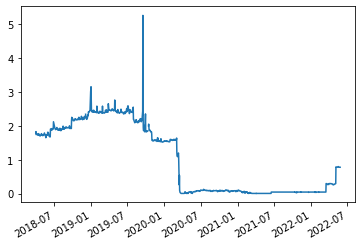

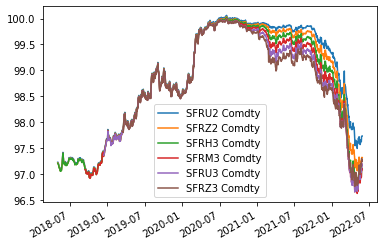

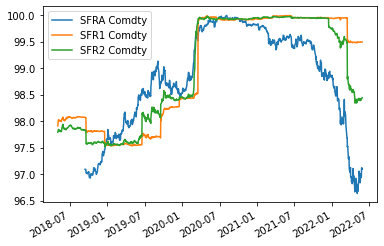

In [13]:
idx_contracts = futs.columns[1:7]
idx_continuous = futs.columns[7:]
idx_index = futs.columns[0]

futs[idx_index].plot()
plt.show()

futs[idx_contracts].plot()
plt.show()

futs[idx_continuous].plot()
plt.show()

### Re-scaling prices as rates

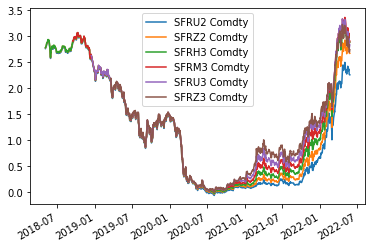

In [14]:
(100-futs[idx_contracts]).plot()
plt.show()

### Continuous rates vs spot

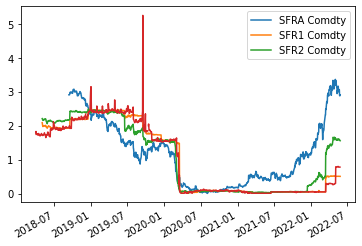

In [15]:
ax = (100-futs[idx_continuous]).plot()
futs[idx_index].plot(ax=ax)
plt.show()

### Futures on a given date

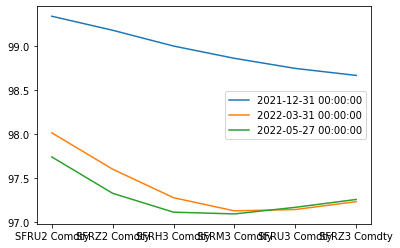

In [16]:
futs.loc[['2021-12-31','2022-03-31','2022-05-27'],idx_contracts].T.plot()
plt.show()

# CME SOFR Indexes

### Not using this currently.

In [7]:
ticks_futures = ['TSFR1M Index','TSFR3M Index']
maturities_futures = ['SOFR Future (CME) - 1mo','SOFR Future (CME) - 3mo']
map_tick_des = dict(keys=maturities_futures, values=ticks_futures)

In [8]:
futs = blp.bdh(tickers=ticks_futures, flds='last_price',\
        start_date=STARTDATE, end_date=ENDDATE).droplevel(level=1,axis=1)

futs.index = pd.to_datetime(futs.index)

In [9]:
info = pd.DataFrame(map_tick_des)
info.columns = ['description','BB ticker']
info = info.set_index('description').sort_index()

In [10]:
if SAVE_DATA:
    outfile = f'../data/sofr_cme_indexes.xlsx'
    with pd.ExcelWriter(outfile) as writer:  
        info.to_excel(writer, sheet_name= 'info', index=True)
        futs.to_excel(writer, sheet_name= 'data', index=True)